SVM Algorithm on Nonlinear data

In [22]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import  Axes3D
import numpy as np


In [23]:
x,y=make_circles(n_samples=500,noise=0.02)

In [24]:
print(x.shape,y.shape)

(500, 2) (500,)


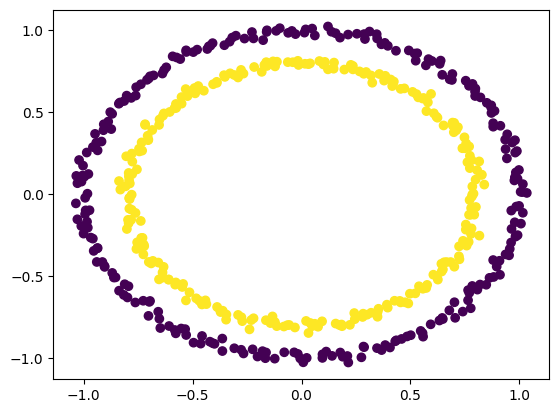

In [25]:
plt.scatter(x[:,0],x[:,1],c=y)

In [26]:
def phi(x):
  """Non Linear Transfromation """
  x1=x[:,0]
  x2=x[:,1]
  x3=x1**2+x2**2

  x_=np.zeros((x.shape[0],3))
  print(x_.shape)

  x_[:,:-1]=x
  x_[:,-1]=x3

  return x_

In [27]:
x_=phi(x)

(500, 3)


In [28]:
print(x[:3,:])

[[-0.55072429  0.55150079]
 [ 0.77799572 -0.24273135]
 [-0.70135384 -0.4137398 ]]


In [29]:
print(x_[:3,:])
#here in tarnsformation we did'nt change the first two columns but we addes a third colummn which is sum of squqres of x1,x2

[[-0.55072429  0.55150079  0.60745037]
 [ 0.77799572 -0.24273135  0.66419585]
 [-0.70135384 -0.4137398   0.66307783]]


In [63]:
def plot3d(x,show=True):
  fig=plt.figure(figsize=(10,10))
  ax=fig.add_subplot(111,projection='3d')
  x1=x[:,0]
  x2=x[:,1]
  x3=x[:,2]
  ax.scatter(x1,x2,x3,zdir='z',s=20,c=y,depthshade=True)
  if(show==True):
      plt.show()
  return ax

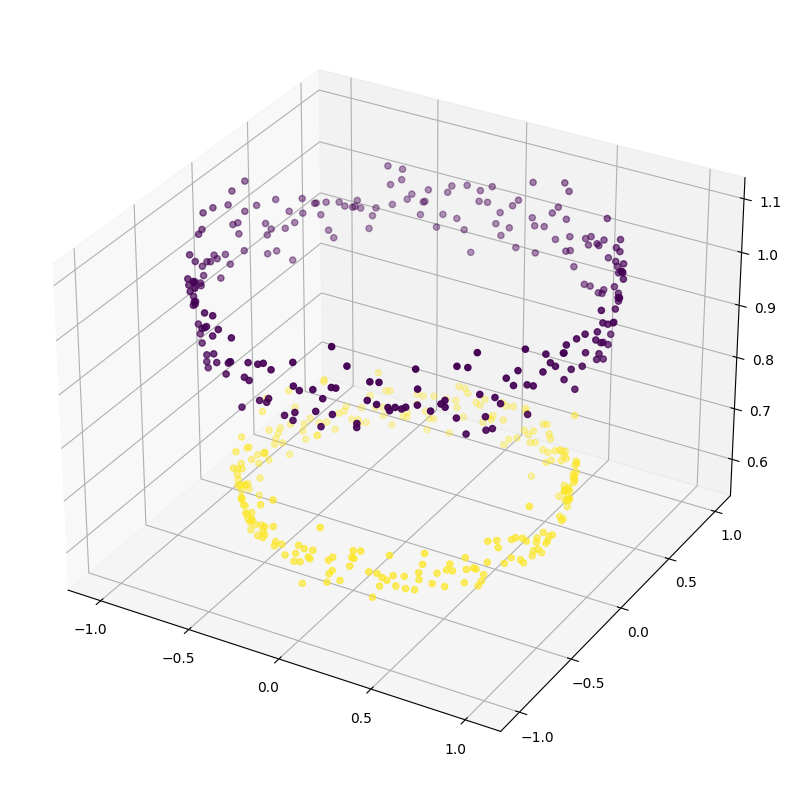

<Axes3D: >

In [64]:
plot3d(x_)

logistic classifier

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [66]:
lr=LogisticRegression()

In [67]:
acc=cross_val_score(lr,x,y,cv=5).mean()
print("accuracy x(2D ) is %.4f"%(acc*100))

accuracy x(2D ) is 45.4000


Logistic Classifier on 3D

In [68]:
acc=cross_val_score(lr,x_,y,cv=5).mean()
print("accuracy x(2D ) is %.4f"%(acc*100))
#with the 3d accuracy is 100%

accuracy x(2D ) is 100.0000


#visualize the descision surface

In [69]:
lr.fit(x_,y)

LogisticRegression()

In [70]:
wts=lr.coef_
wts

array([[  0.03395196,  -0.01128673, -10.87825254]])

In [71]:
bias=lr.intercept_
bias

array([8.91641466])

In [72]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [76]:
z=-(wts[0,0]**xx + wts[0,1]**yy+bias)/wts[0,2]
print(z)

[[802.17936921 725.14051188 722.52489152 722.43608607]
 [ 72.42140415  -4.61745318  -7.23307354  -7.32187898]
 [ 80.6579858    3.61912847   1.00350811   0.91470267]
 [ 80.56502172   3.52616439   0.91054403   0.82173859]]


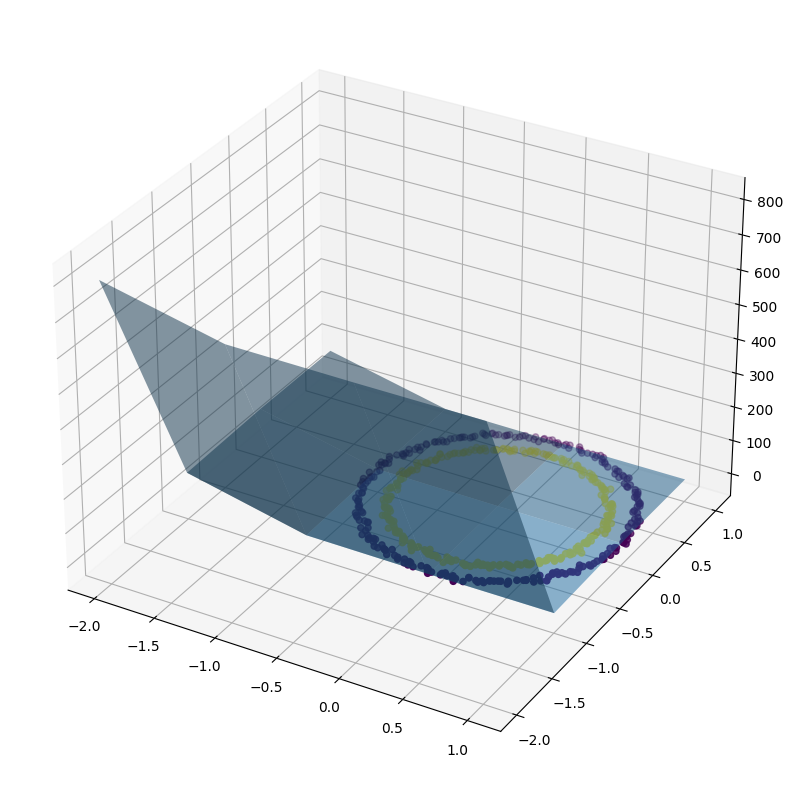

In [80]:
 ax=plot3d(x_,False)
ax=ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()